#**IRIS FLOWER CLASSIFICATION**

```
The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).
```

**Import Modules**
********

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

**Loading the Datasets**
******

In [62]:
# Load the data from csv to Pandas Dataframe
iris_data = pd.read_csv("/content/IRIS.csv")
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# Printing first 5 rows of the dataframes
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Printing last 5 rows of the dataframes
iris_data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
#Number of rows and columns
iris_data.shape

(150, 5)

In [7]:
# to display no. of species on each class
iris_data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [8]:
# Getting some information about data
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Preprocessing the Datasets**
*******

In [9]:
# Check the number of missing value in each column/Null Values
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
# To display stats about data
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Exploratory Data Analysis(EDA)/Data Visualization**

<Axes: >

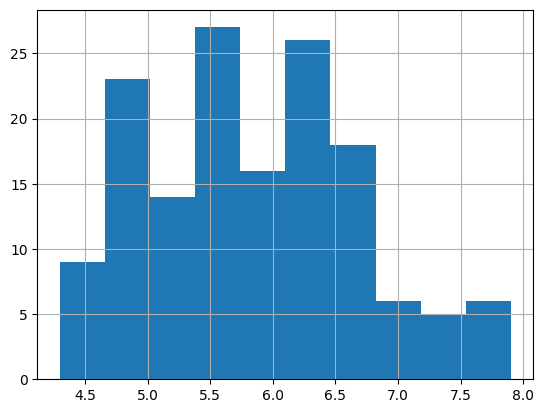

In [11]:
# histograms of sepal_length
iris_data['sepal_length'].hist()

<Axes: >

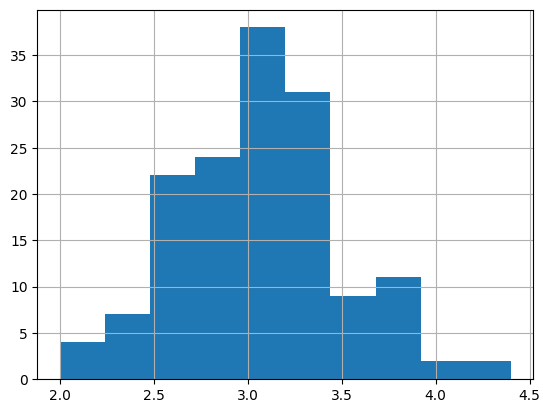

In [12]:
# histograms of sepal_width
iris_data['sepal_width'].hist()

<Axes: >

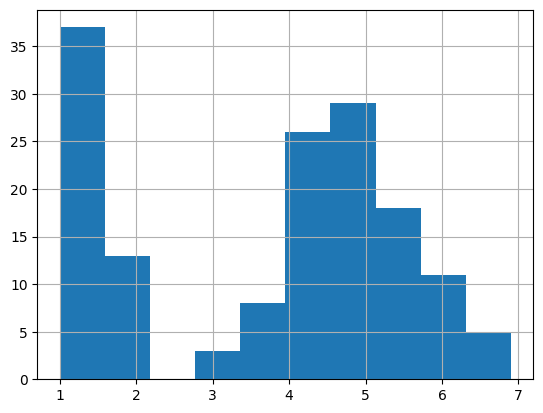

In [13]:
# histograms of petal_length
iris_data['petal_length'].hist()

<Axes: >

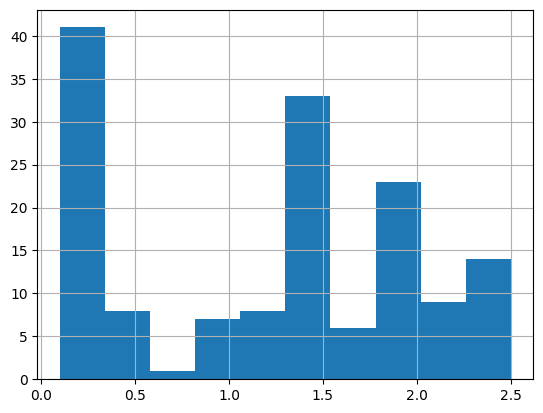

In [14]:
# histograms of petal_width
iris_data['petal_width'].hist()

In [15]:
#Scatterplot
colors = ['red','orange','blue']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

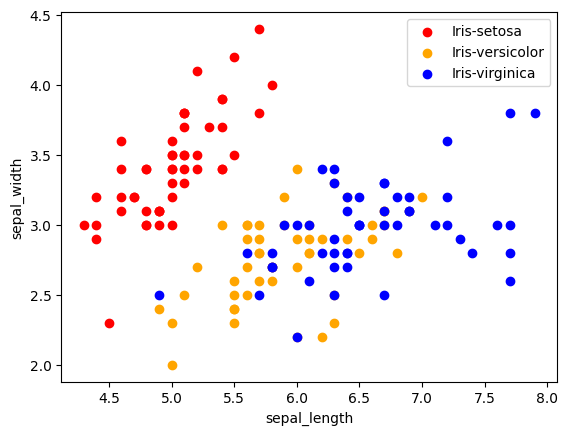

In [16]:
for i in range(3):
  x = iris_data[iris_data['species'] == species[i]]
  plt.scatter(x['sepal_length'],x['sepal_width'], c = colors[i],label = species[i])
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.legend()

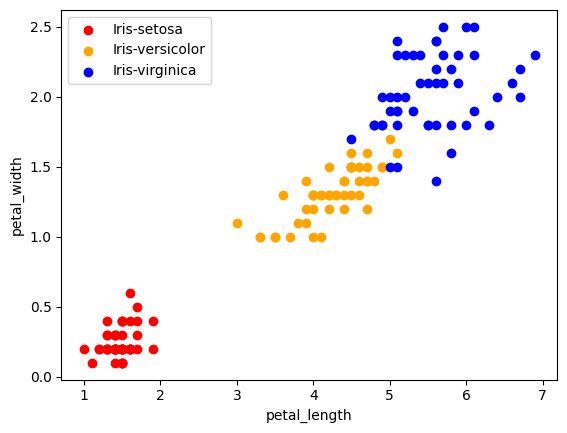

In [17]:
for i in range(3):
  x = iris_data[iris_data['species'] == species[i]]
  plt.scatter(x['petal_length'],x['petal_width'], c = colors[i],label = species[i])
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.legend()

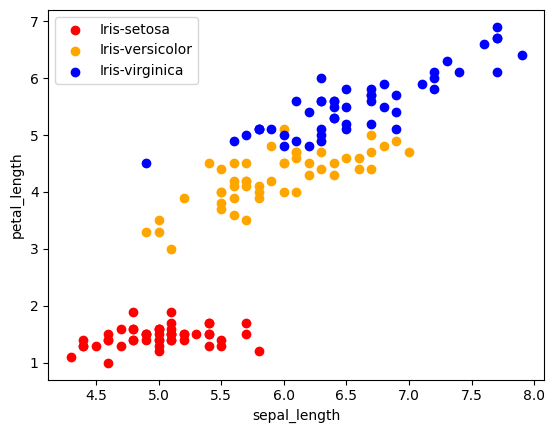

In [18]:
for i in range(3):
  x = iris_data[iris_data['species'] == species[i]]
  plt.scatter(x['sepal_length'],x['petal_length'], c = colors[i],label = species[i])
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.legend()

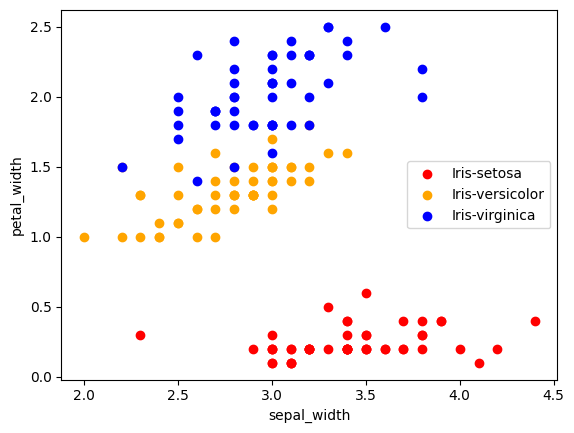

In [19]:
for i in range(3):
  x = iris_data[iris_data['species'] == species[i]]
  plt.scatter(x['sepal_width'],x['petal_width'], c = colors[i],label = species[i])
plt.xlabel("sepal_width")
plt.ylabel("petal_width")
plt.legend()

**Correlation Matrix**
******

```
A correlation matrix is a table showing correlation coefficient between variables. Each cell in the table shows the correlation between two variables. The value is the range of -1 to 1.
```

In [20]:
iris_data.corr()

<ipython-input-20-5c5a46e05691>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris_data.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<ipython-input-21-60acf92b65d3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = iris_data.corr()


<Axes: >

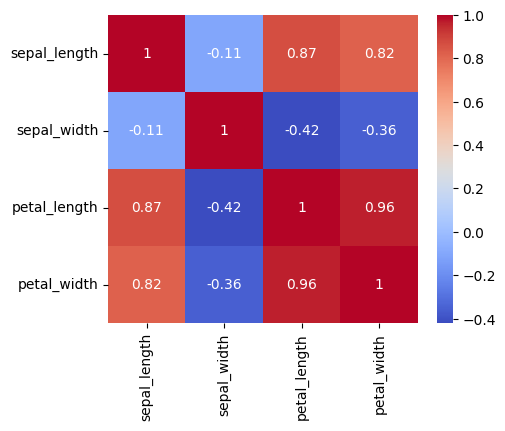

In [21]:
corr = iris_data.corr()
fig,ax = plt.subplots(figsize = (5,4))
sns.heatmap(corr,annot=True,ax = ax,cmap = 'coolwarm')

**Label Encoder**
*****

```
Label Encoding refers to converting the labels into numerical forms so as to convert it into the machine - readable form.
```

In [22]:
le  = LabelEncoder()
iris_data['species'] = le.fit_transform(iris_data['species'])

In [23]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
iris_data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


**Model Training**
*****

In [53]:
# train  = 70
# test = 30

X = iris_data.drop(columns=['species'])
Y = iris_data['species']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

In [54]:
# Logistic Regression
model = LogisticRegression()

In [55]:
# model training
model.fit(x_train,y_train)

LogisticRegression()

In [56]:
# print metric to get performance
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 100.0


In [57]:
#KNN (K-Nearest Neighbours)
model = KNeighborsClassifier()

#model training
model.fit(x_train,y_train)

KNeighborsClassifier()

In [58]:
# print metric to get performance
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 100.0


In [59]:
# Decision tree
model = DecisionTreeClassifier()

In [60]:
#model training
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [61]:
# print metric to get performance
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 100.0


#**Conclusion**

```
 IRIS flower classification project showcased the successful application of various machine learning algorithms to accurately classify iris flowers. The dataset was divided into 70% training data and 30% testing data to evaluate the model performance. The implemented machine learning models including Logistic Regression, K-Nearest Neighbors (KNN), and Decision Tree exhibited remarkable results, achieving a 100% accuracy score on the test data.
          The process of data preparation, feature selection, model training, and evaluation was meticulously executed, leading to the achievement of a perfect accuracy score. The Logistic Regression model, KNN, and Decision Tree demonstrated their capability to generalize patterns within the iris dataset, enabling accurate classification of different flower species.

 Nonetheless, this project underscores the power of machine learning techniques in solving complex classification tasks and highlights the importance of appropriate model selection and evaluation strategies. Further exploration could involve the use of more advanced algorithms, hyperparameter tuning, and cross-validation techniques to ensure the model's robustness and generalization ability across different datasets.
```




